# Import libraries


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [30]:
df = pd.read_csv('used_cars_data.csv')

# Preprocessing
# Drop irrelevant columns

In [31]:
df = df.drop(['Name', 'New_Price'], axis=1)

In [32]:
# Handle missing values
# Impute missing values in 'Mileage' column with median value
mileage_median = df['Mileage'].median()
df['Mileage'].fillna(mileage_median, inplace=True)

# Impute missing values in 'Engine' column with median value
engine_median = df['Engine'].median()
df['Engine'].fillna(engine_median, inplace=True)

# Impute missing values in 'Power' column with median value
power_median = df['Power'].median()
df['Power'].fillna(power_median, inplace=True)

# Impute missing values in 'Seats' column with median value
seats_median = df['Seats'].median()
df['Seats'].fillna(seats_median, inplace=True)

# Convert categorical variables to numeric

In [33]:
df['Location'] = pd.factorize(df['Location'])[0]
df['Fuel_Type'] = pd.factorize(df['Fuel_Type'])[0]
df['Transmission'] = pd.factorize(df['Transmission'])[0]
df['Owner_Type'] = pd.factorize(df['Owner_Type'])[0]

# Split dataset into features and target variable

In [34]:
X = df.drop(['Price'], axis=1)
y = df['Price']

# Split dataset into training and testing sets

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaluate the model

In [37]:
from sklearn.metrics import mean_squared_error
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 4.156182195174443


# Visualize predicted vs actual prices on test dataset


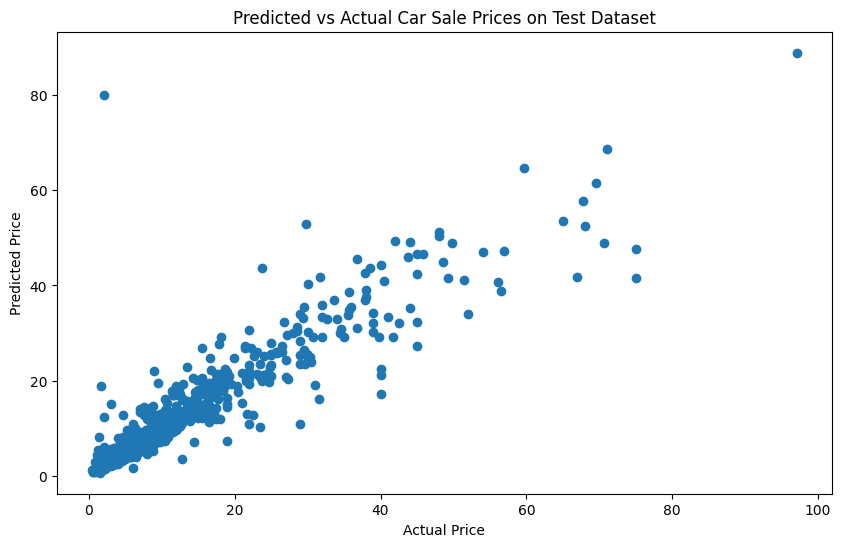

In [42]:
plt.figure(figsize=(10,6))
plt.title('Predicted vs Actual Car Sale Prices on Test Dataset')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Visualize feature importances

In [38]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

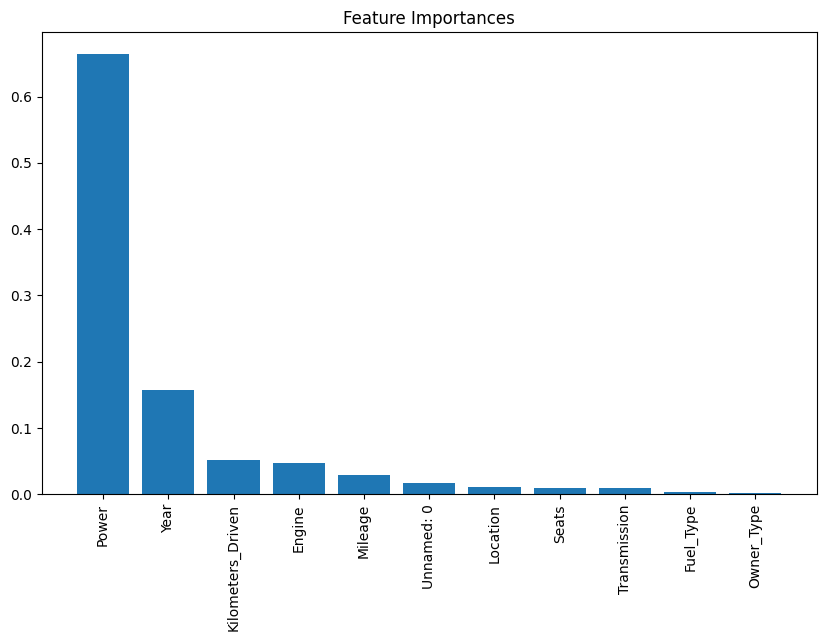

In [39]:
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()